In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns
# %matplotlib inline
sns.set()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

color_list = sns.color_palette()

### CIFAR10

In [14]:
cifar10_str = 'mask_0_0'

numval = 5
numseed = 4

# ind 0: latent dim, ind 1: seed
# mask 0_0, noise_0.1_1
psnr_ndpca = [[21.05, 20.3, 19.39, 17.74, 16.35],
		[21.15, 20.48, 19.4, 17.74, 16.35],
		[21.06, 20.38, 19.4, 17.75, 16.35],
		[21.19, 20.49, 19.41, 17.75, 16.35]]

psnr_ndpca_task_agnostic = [[19.0, 18.72, 18.36, 17.58, 16.3],
		[18.98, 18.77, 18.43, 17.61, 16.29],
		[18.89, 18.39, 18.13, 17.38, 16.11],
		[18.77, 18.26, 18.17, 17.33, 15.98]]

psnr_jae = [[21.21, 20.48, 19.4, 18.04, 16.69],
		[21.13, 20.51, 19.44, 18.04, 16.67],
		[21.21, 20.45, 19.45, 17.92, 16.7],
		[21.07, 20.48, 19.46, 17.98, 16.69]]

psnr_dae = [[19.97, 19.41, 18.63, 17.44, 16.43],
		  [19.98, 19.35, 18.66, 17.54, 16.46],
		  [19.94, 19.39, 18.63, 17.44, 16.44],
		  [19.87, 19.4, 18.68, 17.52, 16.42]]

# 19.94 21.11
# psnr_sep_enc_dec = [[19.56, 18.93, 18.08, 16.78, 15.58],
# 		[19.51, 18.89, 18.06, 16.79, 15.61],
# 		[19.48, 18.9, 18.04, 16.75, 15.58],
# 		[19.49, 18.85, 18.03, 16.78, 15.59]]

psnr_uncompressed = [23.2, 23.2, 23.2, 23.2, 23.2]

Z = [64, 48, 32, 16, 8]

Z1 = [[52, 39, 26, 13, 7],
	[52, 39, 26, 13, 7],
	[52, 39, 26, 13, 7],
	[52, 39, 26, 13, 7]]

# convert to numpy array and transpose
psnr_dae = np.array(psnr_dae).T
psnr_jae = np.array(psnr_jae).T
psnr_ndpca_task_agnostic = np.array(psnr_ndpca_task_agnostic).T
psnr_ndpca = np.array(psnr_ndpca).T
# psnr_sep_enc_dec = np.array(psnr_sep_enc_dec).T
psnr_uncompressed = np.array(psnr_uncompressed).T

Z = np.array(Z).T
Z1 = np.array(Z1).T

Z2 = np.zeros((numval, numseed))
### calculate Z2 = Z - Z1
for i in range(numval):
	for j in range(numseed):
		Z2[i, j] = Z[i] - Z1[i, j]

Z1 = np.flip(Z1, axis=0)
Z2 = np.flip(Z2, axis=0)
Z = np.flip(Z, axis=0)

psnr_ndpca = np.flip(psnr_ndpca, axis=0)
psnr_jae = np.flip(psnr_jae, axis=0)
psnr_ndpca_task_agnostic = np.flip(psnr_ndpca_task_agnostic, axis=0)
psnr_dae = np.flip(psnr_dae, axis=0)
# psnr_sep_enc_dec = np.flip(psnr_sep_enc_dec, axis=0)

In [15]:
cifar_df = pd.DataFrame()
### add columns
for i in range(len(psnr_dae)): ### latent dim
    for j in range(len(psnr_dae[0])): ### seed
        cifar_df = cifar_df.append({'dpca_dim': Z[i], 'Z1': Z1[i, j], 'Z2': Z2[i, j] ,'psnr': psnr_ndpca[i, j], 'method': 'NDPCA (ours)', 'seed': j}, ignore_index=True)
        cifar_df = cifar_df.append({'dpca_dim': Z[i], 'Z1': Z1[i, j], 'Z2': Z2[i, j] ,'psnr': psnr_dae[i, j], 'method': 'DAE', 'seed': j}, ignore_index=True)
        cifar_df = cifar_df.append({'dpca_dim': Z[i], 'Z1': Z1[i, j], 'Z2': Z2[i, j] ,'psnr': psnr_jae[i, j], 'method': 'JAE', 'seed': j}, ignore_index=True)
        cifar_df = cifar_df.append({'dpca_dim': Z[i], 'Z1': Z1[i, j], 'Z2': Z2[i, j] ,'psnr': psnr_ndpca_task_agnostic[i, j], 'method': 'Task-agnostic NDPCA', 'seed': j}, ignore_index=True)
        # cifar_df = cifar_df.append({'dpca_dim': Z[i], 'Z1': Z1[i, j], 'Z2': Z2[i, j] ,'psnr': psnr_sep_enc_dec[i, j], 'method': 'SepEncDec', 'seed': j}, ignore_index=True)
        cifar_df = cifar_df.append({'dpca_dim': Z[i], 'Z1': Z1[i, j], 'Z2': Z2[i, j] ,'psnr': psnr_uncompressed[i], 'method': 'Uncompressed', 'seed': j}, ignore_index=True)

cifar_df.to_csv('cifar.csv', index=False)

### PnP

In [16]:
pnp_df = pd.read_csv('lift.csv')
pnp_df.drop(columns=['dim of z1 share'], inplace=True)
pnp_df.rename(columns={"dim of z1 private": "Z1", "dim of z2 private": "Z2"}, inplace=True)
pnp_df = pnp_df[pnp_df['method'] != 'No NDPCA']
pnp_df.sort_values(by=['dpca_dim', 'Z1', 'Z2', 'method', 'seed'], inplace=True)
### drop rows with dpca_dim > 24
pnp_df = pnp_df[pnp_df['dpca_dim'] <= 24]
idx = pnp_df[(pnp_df['method'] == 'No DPCA module')].index
pnp_df.drop(idx, inplace=True)

JAE_map = [[0.68, 0.56, 0.80, 0.58]
          ,[0.49, 0.65, 0.81, 0.81]
          ,[0.64, 0.77, 0.78, 0.80]
          ,[0.60, 0.78, 0.73, 0.75]
          ,[0.64, 0.80, 0.77, 0.68]
]

DAE_map = [[0.60, 0.67, 0.80, 0.64]
          ,[0.50, 0.67, 0.60, 0.63]
          ,[0.28, 0.83, 0.69, 0.78]
          ,[0.70, 0.73, 0.67, 0.78]
          ,[0.69, 0.77, 0.80, 0.72]
]
# 71% 80.2%
# Sep_map = [[0, 0, 0, X]
# 		  ,[0, 0, 0, X]
# ]

AE_Zs = [4, 8, 12, 24]

for z_ind, z in enumerate(AE_Zs):
	for seed in range(len(DAE_map)):
		pnp_df = pnp_df.append({'dpca_dim': z, 'Z1': z, 'Z2': 0 ,'success rate': DAE_map[seed][z_ind], 'method': 'DAE', 'seed': seed}, ignore_index=True)

for z_ind, z in enumerate(AE_Zs):
	for seed in range(len(DAE_map)):
		pnp_df = pnp_df.append({'dpca_dim': z, 'Z1': z, 'Z2': 0 ,'success rate': JAE_map[seed][z_ind], 'method': 'JAE', 'seed': seed}, ignore_index=True)


for z in np.arange(4, 25, 4): ### latent dim
	pnp_df = pnp_df.append({'dpca_dim': z, 'Z1': z, 'Z2': 0 ,'success rate': 0.83, 'method': 'Uncompressed', 'seed': 0}, ignore_index=True)

custom_dict = {'NDPCA (ours)': 0, 'DAE': 1, 'JAE': 2, 'Task-agnostic NDPCA': 3, 'uncompressed': 4} # NDPCA, DAE, JAE, agnostic, uncompressed
pnp_df_ = pnp_df.sort_values(by=['method'], key=lambda x: x.map(custom_dict))
pnp_df_.to_csv('_.csv', index=False)

### Airbus

In [17]:
airbus_df = pd.read_csv('./airbus.csv') # seed 0 ep 349
airbus_df.drop(columns=['dim of z2 private'], inplace=True)
airbus_df.rename(columns={"dim of z1 private": "$Z_1$", "dim of z1 share": "$Z_2$"}, inplace=True)
airbus_df = airbus_df[airbus_df['method'] != 'No NDPCA']

JAE_map = [[0.2781, 0.6603, 0.7343, 0.8007]
          ,[0.2905, 0.5993, 0.6646, 0.7595]
]
DAE_map = [[0.2087, 0.5329, 0.6188, 0.6531]
          ,[0.1453, 0.5617, 0.5843, 0.6338]
]

# 0.6434 0.7866
# Sep_map = [[0, 0, 0, X]
# 		  ,[0, 0, 0, X]
# ]

### ablation study
# NoPCA_map = [[] X
	     		# X
# ]

AE_Zs = [4, 12, 20, 40]

for z_ind, z in enumerate(AE_Zs):
	for seed in range(len(JAE_map)):
		airbus_df = airbus_df.append({'dpca_dim': z, 'Z1': z, 'Z2': 0 ,'testmAP': DAE_map[seed][z_ind], 'method': 'DAE', 'seed': seed}, ignore_index=True)
		airbus_df = airbus_df.append({'dpca_dim': z, 'Z1': z, 'Z2': 0 ,'testmAP': JAE_map[seed][z_ind], 'method': 'JAE', 'seed': seed}, ignore_index=True)


for z in np.arange(4, 41, 4): ### latent dim
	airbus_df = airbus_df.append({'dpca_dim': z, 'Z1': z, 'Z2': 0 ,'testmAP': 0, 'method': 'Task-agnostic NDPCA', 'seed': 0}, ignore_index=True)
	airbus_df = airbus_df.append({'dpca_dim': z, 'Z1': z, 'Z2': 0 ,'testmAP': 0, 'method': 'Task-agnostic NDPCA', 'seed': 1}, ignore_index=True)
	airbus_df = airbus_df.append({'dpca_dim': z, 'Z1': z, 'Z2': 0 ,'testmAP': 0.83, 'method': 'Uncompressed', 'seed': 0}, ignore_index=True)

idx = airbus_df[(airbus_df['method'] == 'No DPCA module')].index
airbus_df.drop(idx, inplace=True)

airbus_df.head()

,dpca_dim,$Z_1$,$Z_2$,testmAP,seed,method,Z1,Z2
0,4,4.0,0.0,0.220770,0,NDPCA (ours),NaN,NaN
1,8,6.0,2.0,0.439348,0,NDPCA (ours),NaN,NaN
2,12,9.0,3.0,0.617028,0,NDPCA (ours),NaN,NaN
3,16,12.0,4.0,0.729553,0,NDPCA (ours),NaN,NaN
4,20,14.0,6.0,0.750393,0,NDPCA (ours),NaN,NaN


### Plots

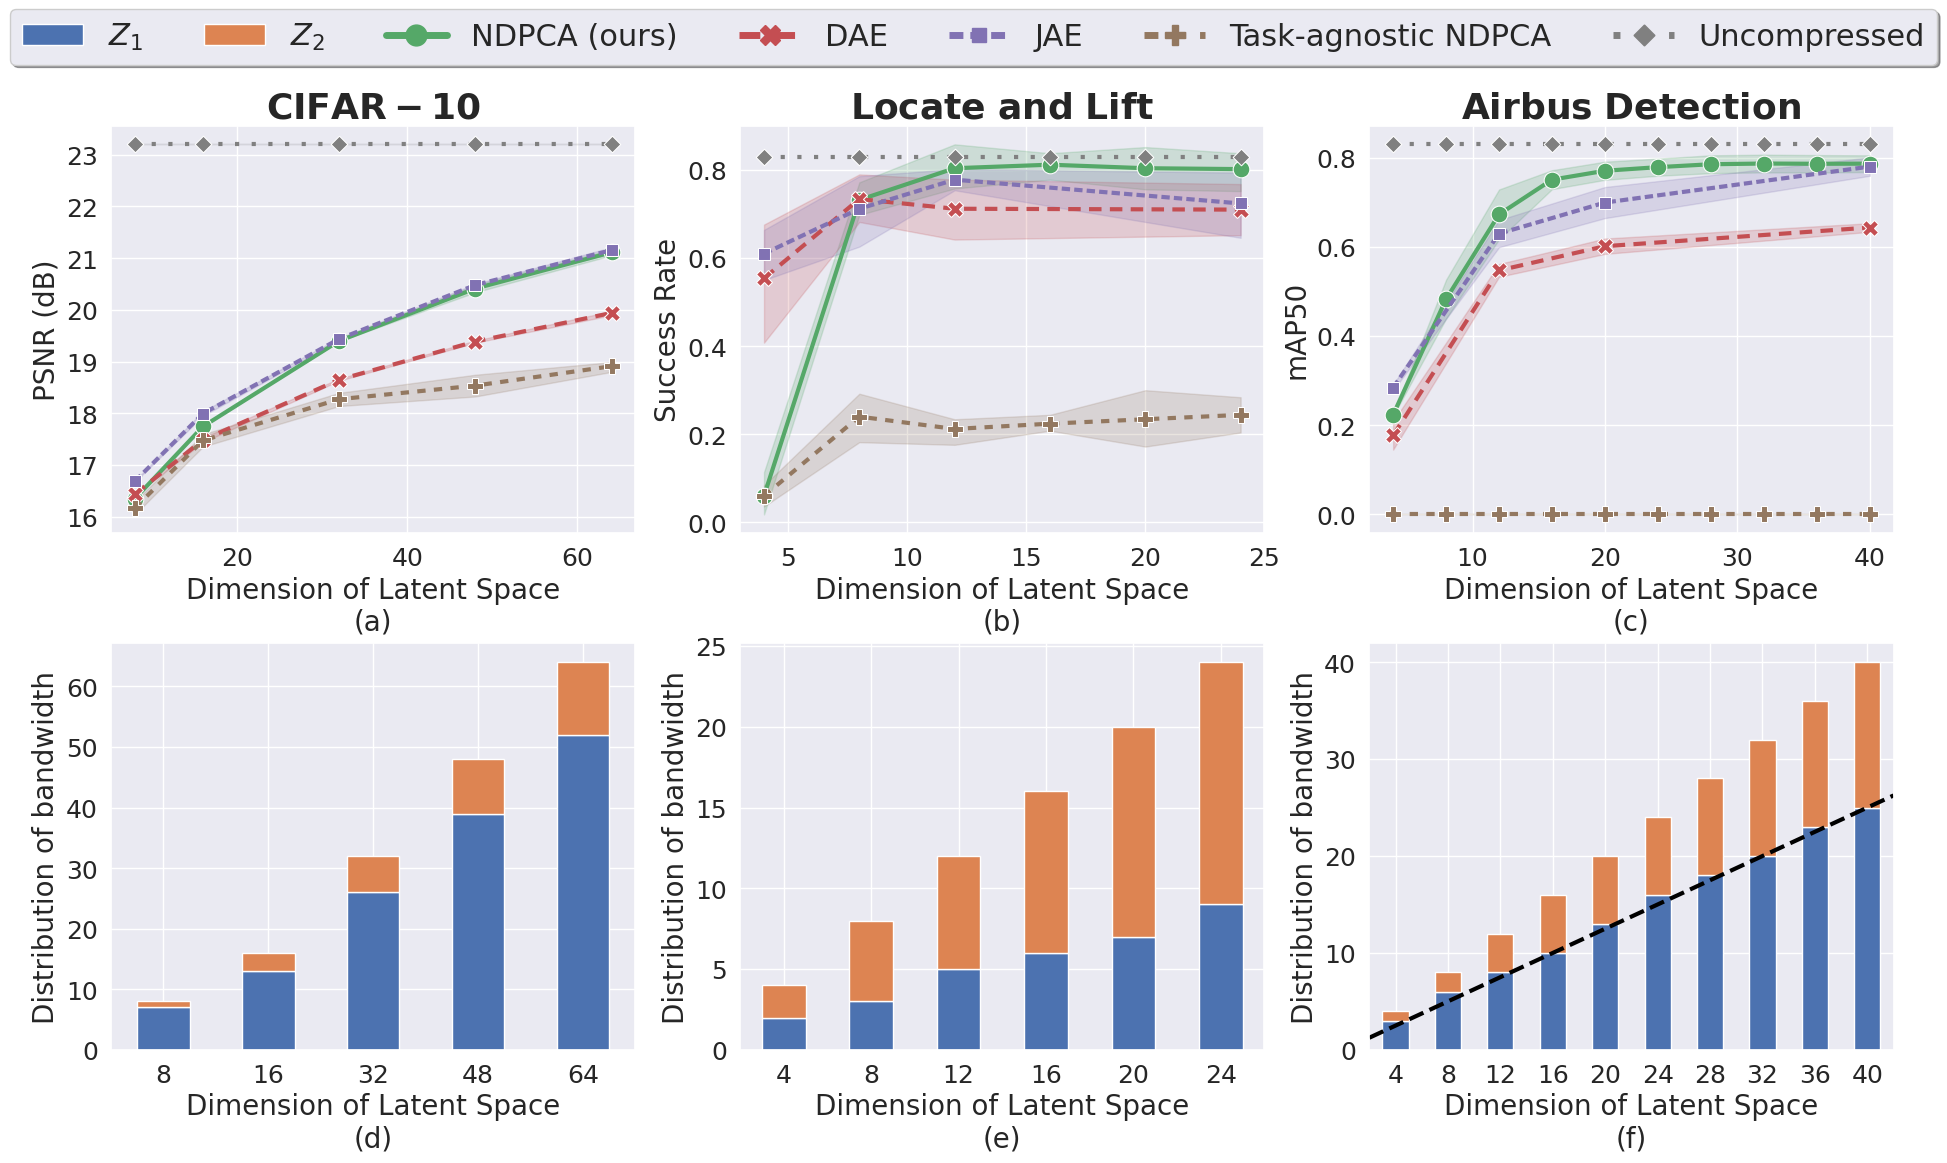

In [18]:
fig, ax_list = plt.subplot_mosaic(
        [["cifar_dpca", "pnp_dpca", "airbus_dpca"], 
        ["cifar_z", "pnp_z", "airbus_z"]],
        figsize=(23, 12))
        # gridspec_kw={
            # set the height ratios between the rows
            # "height_ratios": [1.5, 1.5, 1.5, 2, 2, 2],
            # set the width ratios between the columns
            # "width_ratios": [1, 1, 1, 1],})

plt.subplots_adjust(hspace=0.27)
xylabelsize = 20
titlesize = 26
legendsize = 22
ticksize = 18

plot1_xlabel = "Dimension of Latent Space"
plot1_ylabel = "Distribution of bandwidth"


####### ax #######
# 1 2 3
# 4 5 6
####### ax #######

### set title
ax_list["cifar_dpca"].set_title(r"$\bf{CIFAR-10}$", fontsize=titlesize)
ax_list["pnp_dpca"].set_title(r"$\bf{Locate~and~Lift}$", fontsize=titlesize)
ax_list["airbus_dpca"].set_title(r"$\bf{Airbus~Detection}$", fontsize=titlesize)


### plot cifar denoising
## plot DPCA curve
ax4 = sns.lineplot(data=cifar_df, x="dpca_dim", y="psnr", ax=ax_list["cifar_dpca"], linewidth=3, hue='method', style="method",
                    palette=[color_list[2], color_list[3], color_list[4], color_list[5], 'gray'], dashes=['', (3,2), (2,1), (2,2), (1,3)], markers=True, markersize=12)
ax_list["cifar_dpca"].set_xlabel("Dimension of Latent Space\n(a)", fontsize=xylabelsize)
ax_list["cifar_dpca"].set_ylabel("PSNR (dB)", fontsize=xylabelsize)
ax_list["cifar_dpca"].tick_params(axis="x", labelsize=ticksize)
ax_list["cifar_dpca"].tick_params(axis="y", labelsize=ticksize)
ax_list["cifar_dpca"].legend().remove()
# ax_list["cifar_dpca"].set_title('PSNR of CIFAR10 denoising', fontsize=titlesize-3)
## plot Z1 and Z2
cifar_df_z = cifar_df.loc[(cifar_df["method"]).str.contains('ours') & (cifar_df["seed"] == cifar_df.iloc[0]["seed"]) ]
cifar_df_z.plot(kind='bar', stacked=True, color=[color_list[0], color_list[1]], ax=ax_list["cifar_z"], 
                x="dpca_dim", y=["Z1", "Z2"], width=0.5, rot=0)
ax_list["cifar_z"].set_xlabel(plot1_xlabel+'\n(d)', fontsize=xylabelsize)
ax_list["cifar_z"].set_ylabel(plot1_ylabel, fontsize=xylabelsize)
ax_list["cifar_z"].tick_params(axis="x", labelsize=ticksize)
ax_list["cifar_z"].tick_params(axis="y", labelsize=ticksize)
ax_list["cifar_z"].legend().remove()


### Plot PNP
## plot DPCA curve
ax5 = sns.lineplot(data=pnp_df_, x="dpca_dim", y="success rate", ax=ax_list["pnp_dpca"], linewidth=3, hue='method', style="method",
                    # palette=[color_list[5], color_list[2], color_list[3], 'gray'], dashes=[(3,2), '', (2,1), (1,3)], markers=True, markersize=12)
                    palette=[color_list[2], color_list[3], color_list[4], color_list[5], 'gray'], dashes=['', (3,2), (2,1), (2,2), (1,3)], markers=True, markersize=12)
ax_list["pnp_dpca"].set_xlabel("Dimension of Latent Space"+'\n(b)', fontsize=xylabelsize)
ax_list["pnp_dpca"].set_ylabel("Success Rate", fontsize=xylabelsize)
ax_list["pnp_dpca"].tick_params(axis="x", labelsize=ticksize)
ax_list["pnp_dpca"].tick_params(axis="y", labelsize=ticksize)
leg = ax_list["pnp_dpca"].legend()
ax_list["pnp_dpca"].legend().remove()
## plot Z1 and Z2
pnp_df_z = pnp_df.loc[(pnp_df["method"]).str.contains('ours') & (pnp_df["seed"] == 1) ]
pnp_df_z.plot(kind='bar', stacked=True, color=[color_list[0], color_list[1]], ax=ax_list["pnp_z"],
                x="dpca_dim", y=["Z1", "Z2"], width=0.5, rot=0)
ax_list["pnp_z"].set_xlabel(plot1_xlabel+'\n(e)', fontsize=xylabelsize)
ax_list["pnp_z"].set_ylabel(plot1_ylabel, fontsize=xylabelsize)
ax_list["pnp_z"].tick_params(axis="x", labelsize=ticksize)
ax_list["pnp_z"].tick_params(axis="y", labelsize=ticksize)
ax_list["pnp_z"].legend().remove()


### Plot AirBus Detection
## plot DPCA curve
ax6 = sns.lineplot(data=airbus_df, x="dpca_dim", y="testmAP", ax=ax_list["airbus_dpca"], linewidth=3, hue='method', style="method",
                    palette=[color_list[2], color_list[3], color_list[4], color_list[5], 'gray'], dashes=['', (3,2), (2,1), (2,2), (1,3)], markers=True, markersize=12)
# NDPCA, DAE, JAE, agnostic, uncompressed
# green, red, purple, brown, gray
ax_list["airbus_dpca"].set_xlabel("Dimension of Latent Space"+'\n(c)', fontsize=xylabelsize)
ax_list["airbus_dpca"].set_ylabel("mAP50", fontsize=xylabelsize)
ax_list["airbus_dpca"].tick_params(axis="x", labelsize=ticksize)
ax_list["airbus_dpca"].tick_params(axis="y", labelsize=ticksize)
leg = ax_list["airbus_dpca"].legend()
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax_list["airbus_dpca"].legend().remove()
## plot Z1 and Z2
airbus_df_z = airbus_df.loc[(airbus_df["method"]).str.contains('ours') & (airbus_df["seed"] == 1) ]
airbus_df_z.plot(kind='bar', stacked=True, color=[color_list[0], color_list[1]], ax=ax_list["airbus_z"],
                x="dpca_dim", y=["$Z_1$", "$Z_2$"], width=0.5, rot=0)
ax_list["airbus_z"].plot([-0.5, 9.5], [1.25, 26.25], color='black', linestyle='dashed', linewidth=3)
ax_list["airbus_z"].set_xlabel(plot1_xlabel+'\n(f)', fontsize=xylabelsize)
ax_list["airbus_z"].set_ylabel(plot1_ylabel, fontsize=xylabelsize)
ax_list["airbus_z"].tick_params(axis="x", labelsize=ticksize)
ax_list["airbus_z"].tick_params(axis="y", labelsize=ticksize)
ax_list["airbus_z"].legend().remove()


### Generate a legend for the first line only
lines_labels = [ax.get_legend_handles_labels() for ax in [ax_list["airbus_z"], ax_list["airbus_dpca"]]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

lgd = fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 0.99), fancybox=True, shadow=True, ncol=7, fontsize=22, markerscale=2.5)
for line in lgd.get_lines():
    line.set_linewidth(5.0)
plt.show()
# fig.savefig('./results.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig('./results.png', bbox_extra_artists=(lgd,), bbox_inches='tight')